In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")



In [3]:
df = pd.read_csv("../data/raw/aug_train.csv")
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
df.shape
df.info()
df.isnull().sum()      #Dataset is imbalanced. More employees are not looking for a job change.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

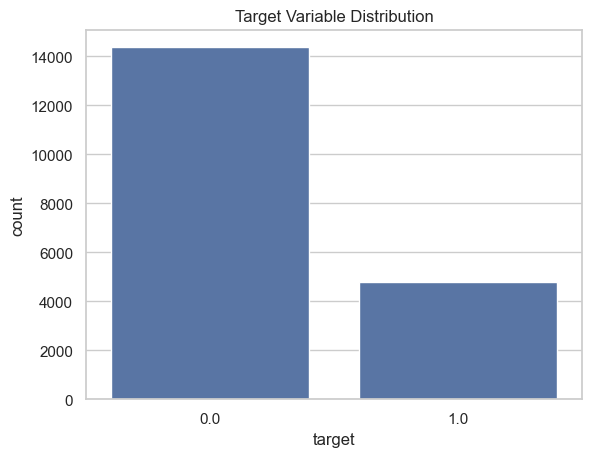

In [5]:
sns.countplot(x="target", data=df)
plt.title("Target Variable Distribution")
plt.show()


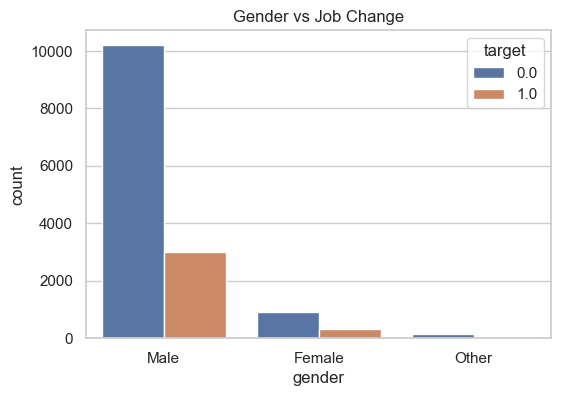

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="target", data=df)
plt.title("Gender vs Job Change")
plt.show()


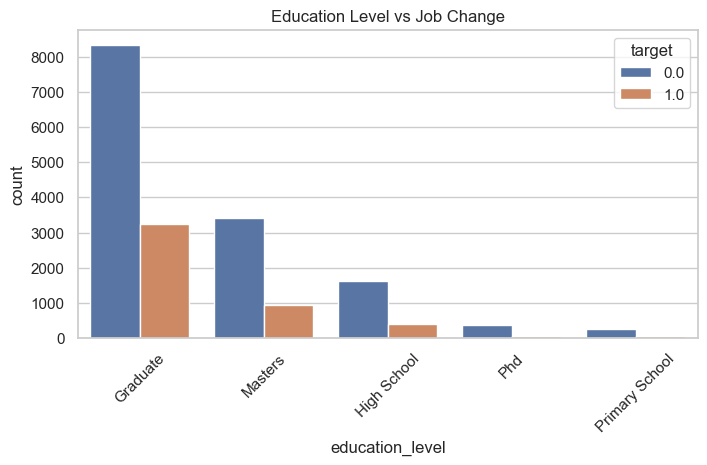

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x="education_level", hue="target", data=df)
plt.title("Education Level vs Job Change")
plt.xticks(rotation=45)
plt.show()


**Observation:**
- Candidates with higher education levels such as Masters and PhD show a relatively higher tendency to look for job change.
- Education level appears to influence job change decisions and will be an important feature for prediction.


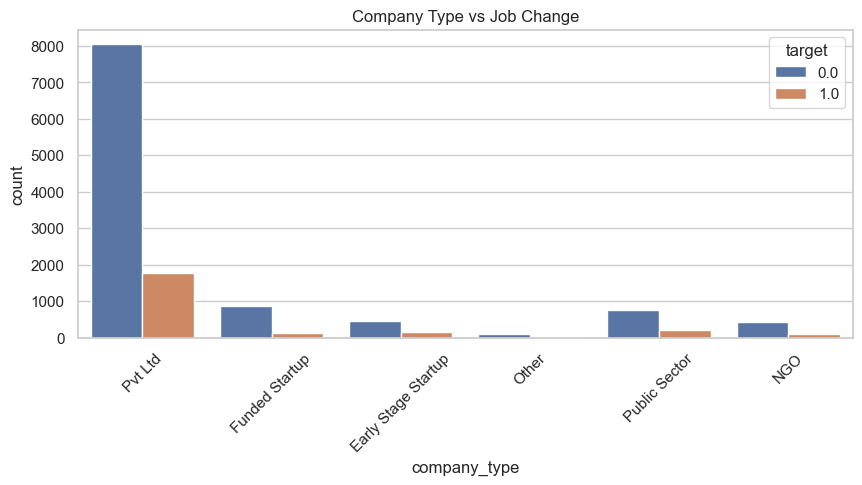

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(x="company_type", hue="target", data=df)
plt.title("Company Type vs Job Change")
plt.xticks(rotation=45)
plt.show()


**Observation:**
- Employees working in certain company types, such as startups or private companies, show higher job change intent.
- Company type may reflect job stability and growth opportunities, making it a significant predictor.


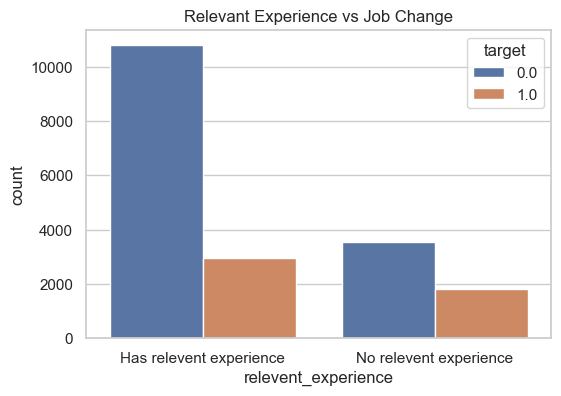

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="relevent_experience", hue="target", data=df)
plt.title("Relevant Experience vs Job Change")
plt.show()


**Observation:**
- Employees with relevant experience are more likely to explore new job opportunities.
- Relevant experience increases market demand, which may lead to higher job change probability.


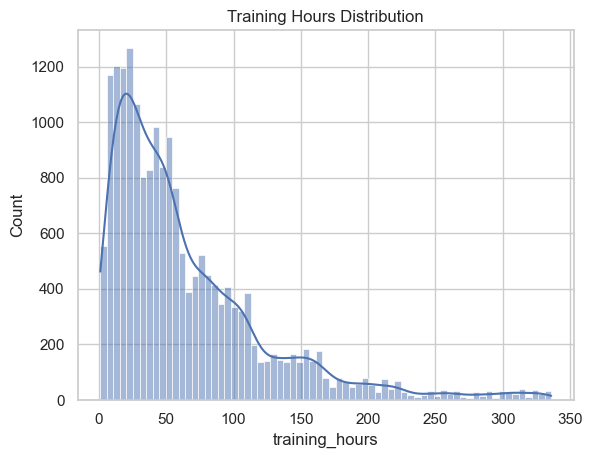

In [11]:
sns.histplot(df["training_hours"], kde=True)
plt.title("Training Hours Distribution")
plt.show()
